# Build a Multiple-step AI Agent Using the LangChain and Cohere API
## Content
1. What Is Cohere Command R+?
2. Setup
3. Exploring Key Features of the Command R+ Python API
4. Building an AI Project Using Command R+

- Tìm hiểu các tính năng cốt lõi của API Cohere
- Sử dụng chúng để xây dựng tác nhân (agent) AI nhiều bước
- Hiểu cơ bản khuôn khổ LangChain và biết cách kết nối các tác nhân AI khác nhau
- Xây dựng một ứng dụng AI thực hiện truy vấn người dùng để tìm kiếm trên web và tạo mã

# 1. What Is Cohere Command R+?

- là LLM mới nhất và tiên tiến nhất của Cohere
- vượt trội trong các tương tác đàm thoại và các tác vụ ngữ cảnh dài
- cho các quy trình làm việc Retrieval Augmented Generation (RAG) phức tạp và sử dụng công cụ nhiều bước
- công cụ mạnh mẽ cho các ứng dụng quy mô doanh nghiệp

# 2. Setup

In [ ]:
%pip install cohere

In [51]:
import os
import cohere
import getpass

In [53]:
api_key = getpass.getpass("Enter API key for Cohere: ")
os.environ['COHERE_API_KEY'] = api_key

In [55]:
cohere_api_key = os.environ.get('COHERE_API_KEY')
# print(cohere_api_key)

In [ ]:
co = cohere.Client(api_key=cohere_api_key)

In [ ]:
response = co.chat(
    model="command-r-plus",
    message="Please help me write an email to the angry boss, who thinks I made the changes to the data pipeline but didn't. It was James.",
)
print(response)

text="Subject: Data Pipeline Changes\n\nDear [Boss],\n\nI hope you are doing well. I am writing this email to address the recent changes made to the data pipeline and the misunderstanding regarding my involvement in those changes.\n\nI understand that you are upset about the modifications, and I want to clarify that I did not make any changes to the data pipeline. I believe there may be a miscommunication or a mistake in identifying the person responsible for these updates.\n\nI would like to assure you that I take my responsibilities seriously and would never make such changes without proper discussion and approval. I value our team's processes and understand the importance of maintaining the integrity of our data systems.\n\nI kindly request that we schedule a meeting to discuss this matter further and identify the source of the misunderstanding. In the meantime, I would be happy to provide any additional information or context that could help clarify the situation.\n\nThank you for 

In [5]:
response.dict()

{'text': "Subject: Data Pipeline Changes\n\nDear [Boss],\n\nI hope you are doing well. I am writing this email to address the recent changes made to the data pipeline and the misunderstanding regarding my involvement in those changes.\n\nI understand that you are upset about the modifications, and I want to clarify that I did not make any changes to the data pipeline. I believe there may be a miscommunication or a mistake in identifying the person responsible for these updates.\n\nI would like to assure you that I take my responsibilities seriously and would never make such changes without proper discussion and approval. I value our team's processes and understand the importance of maintaining the integrity of our data systems.\n\nI kindly request that we schedule a meeting to discuss this matter further and identify the source of the misunderstanding. In the meantime, I would be happy to provide any additional information or context that could help clarify the situation.\n\nThank you 

In [6]:
response.construct()

NonStreamedChatResponse(text=None, generation_id=None, response_id=None, citations=None, documents=None, is_search_required=None, search_queries=None, search_results=None, finish_reason=None, tool_calls=None, chat_history=None, prompt=None, meta=None)

In [7]:
response.json()

'{"text":"Subject: Data Pipeline Changes\\n\\nDear [Boss],\\n\\nI hope you are doing well. I am writing this email to address the recent changes made to the data pipeline and the misunderstanding regarding my involvement in those changes.\\n\\nI understand that you are upset about the modifications, and I want to clarify that I did not make any changes to the data pipeline. I believe there may be a miscommunication or a mistake in identifying the person responsible for these updates.\\n\\nI would like to assure you that I take my responsibilities seriously and would never make such changes without proper discussion and approval. I value our team\'s processes and understand the importance of maintaining the integrity of our data systems.\\n\\nI kindly request that we schedule a meeting to discuss this matter further and identify the source of the misunderstanding. In the meantime, I would be happy to provide any additional information or context that could help clarify the situation.\\n

In [8]:
response.json()

'{"text":"Subject: Data Pipeline Changes\\n\\nDear [Boss],\\n\\nI hope you are doing well. I am writing this email to address the recent changes made to the data pipeline and the misunderstanding regarding my involvement in those changes.\\n\\nI understand that you are upset about the modifications, and I want to clarify that I did not make any changes to the data pipeline. I believe there may be a miscommunication or a mistake in identifying the person responsible for these updates.\\n\\nI would like to assure you that I take my responsibilities seriously and would never make such changes without proper discussion and approval. I value our team\'s processes and understand the importance of maintaining the integrity of our data systems.\\n\\nI kindly request that we schedule a meeting to discuss this matter further and identify the source of the misunderstanding. In the meantime, I would be happy to provide any additional information or context that could help clarify the situation.\\n

In [11]:
response.text

"Subject: Data Pipeline Changes\n\nDear [Boss],\n\nI hope you are doing well. I am writing this email to address the recent changes made to the data pipeline and the misunderstanding regarding my involvement in those changes.\n\nI understand that you are upset about the modifications, and I want to clarify that I did not make any changes to the data pipeline. I believe there may be a miscommunication or a mistake in identifying the person responsible for these updates.\n\nI would like to assure you that I take my responsibilities seriously and would never make such changes without proper discussion and approval. I value our team's processes and understand the importance of maintaining the integrity of our data systems.\n\nI kindly request that we schedule a meeting to discuss this matter further and identify the source of the misunderstanding. In the meantime, I would be happy to provide any additional information or context that could help clarify the situation.\n\nThank you for your 

# 3. Exploring Key Features of the Command R+ Python API

## 3.1. Text generation

In [13]:
response = co.chat(
    model="command-r-plus",
    preamble="You are a happy chatbot that puts a positive spin on everything.",
    chat_history=[
       {"role": "USER", "text": "Hey, my name is Abid!"},
       {"role": "CHATBOT", "text": "Hey Abid! How can I help you today?"},
    ],
    message="I can't swim?",
    max_tokens=150,
    temperature=0.7
)

print(response.text)

That's okay! Swimming isn't for everyone. There are plenty of other fun water activities that you can try, like floating in a pool or relaxing on a beach. If you ever change your mind about swimming, there are lots of great resources available to help you learn.


## 3.2. Streaming

In [15]:
response = co.chat_stream(
    model="command-r-plus",
    message="Tell me something interesting about Galaxy!",
)

for event in response:
    if event.event_type == "text-generation":
        print(event.text, end="")
    elif event .event_type == "steaming-end":
        print(event.finish_reason, end="")

Our galaxy, the Milky Way, is a barred spiral galaxy that contains over 100 billion stars, including our Sun. It is part of the Local Group of galaxies, which forms a small portion of the larger Laniakea Supercluster. Here are a few interesting facts about our galaxy:

**1. The Milky Way's Size and Mass:** The Milky Way is enormous, with an estimated diameter of about 100,000 to 180,000 light-years. It has a mass of about 1 trillion solar masses, encompassing stars, gas, dust, and dark matter.

**2. Galactic Center:** At the heart of the Milky Way lies a supermassive black hole known as Sagittarius A* (pronounced "Sagittarius A-star"). This black hole has a mass of about 4 million times that of our Sun and is surrounded by a dense cluster of stars.

**3. Spiral Arms:** The Milky Way exhibits a spiral structure with four major arms: the Scutum-Crux, Sagittarius, Perseus, and Norma Arms. These spiral arms are regions of higher star density and are often sites of active star formation.

*

## 3.3. Predictable output

Đôi hỏi một câu hỏi hai lần, có thể nhận được câu trả lời khác nhau, hãy thêm vào một tham số seed để đảm bảo kết quả nhất quán và có thể tái tạo.

In [28]:
model_name = "command-r-plus"

response = co.chat(
    model=model_name,
    message="Say a random name!",
    seed=55,
)
print(response.text)

Sure! Here's a random name: 

**Hazel Williams** 

Would you like me to suggest another name or provide any other fun suggestions? I can be quite creative!


In [29]:
model_name = "command-r-plus"

response = co.chat(
    model=model_name,
    message="Bạn có hỗ trợ tiếng Việt không?",
    seed=55,
)
print(response.text)

Có, tôi hỗ trợ tiếng Việt. Bạn có thể hỏi tôi bất cứ điều gì và tôi sẽ cố gắng trả lời bằng tiếng Việt.


In [34]:
def get_response(model_name, human_message, documents):
    response = co.chat(
        model=model_name,
        message=human_message,
        seed=55,
        documents=documents
    )
    return response.text

In [ ]:
print(get_response(
    model_name=model_name, 
    human_message="Tôi có thể fine-tuning model command-r-plus trên bộ dữ liệu của tôi và chạy trên mọt máy tính cá nhân"\
    "mà không dùng api không? và tôi có mất bất kì khoản chi phí nào không? và nếu có thì tôi có thể download model của bạn ở đâu?",
    documents=None
))

Vâng, bạn có thể fine-tuning (luyện tập tinh chỉnh) model Command-R-Plus trên bộ dữ liệu của bạn và chạy nó trên máy tính cá nhân mà không cần sử dụng API. Hiện tại, model Command-R-Plus là một model độc quyền của Cohere và không thể được download hoặc sử dụng một cách độc lập ngoài nền tảng của chúng tôi.

Tuy nhiên, bạn có thể sử dụng Cohere Platform để fine-tuning model trên bộ dữ liệu của bạn. Chúng tôi cung cấp một số gói trả phí khác nhau tùy thuộc vào nhu cầu và quy mô của dự án. Bạn có thể đăng ký và tạo tài khoản trên trang web chính thức của Cohere để tìm hiểu thêm về các lựa chọn giá cả và bắt đầu sử dụng nền tảng của chúng tôi.

Về chi phí, Cohere cung cấp một số gói khác nhau với mức giá khác nhau tùy thuộc vào nhu cầu sử dụng. Bạn có thể tham khảo chi tiết về giá cả trên trang web chính thức của chúng tôi. Chúng tôi luôn nỗ lực mang đến giải pháp hiệu quả và linh hoạt cho khách hàng, vì vậy bạn có thể chọn gói phù hợp với nhu cầu và ngân sách của mình.

Chúng tôi hy vọng 

## 3.4. Retrieval augmented generation (RAG)

- API Cohere cung cấp một hàm tích hợp để thực hiện RAG. Chúng ta chỉ cần cung cấp cho hàm .chat() một đối số documents.
- Khi đặt câu hỏi, nó sẽ chạy tìm kiếm tương tự trên các tài liệu để tạo ra các câu trả lời có nhận thức ngữ cảnh. 
- Định dạng của các tài liệu phải tương tự như ví dụ bên dưới. Mỗi tài liệu phải chứa các khóa tiêu đề và đoạn trích.
- Đoạn code dưới đây sử dụng dữ liệu anime làm ví dụ

In [33]:
anime = [
    {
        "title": "Naruto Popularity Analysis",
        "snippet": "Naruto's global success: massive manga sales, top anime ratings, extensive merchandise, and a dedicated fanbase. The series' impact on anime culture and its influence on subsequent shonen series is undeniable."
    },
    {
        "title": "One Piece Popularity Analysis",
        "snippet": "One Piece's record-breaking manga sales and its status as a long-running anime phenomenon highlight its popularity. The series' captivating story and characters have made it a staple in the anime community."
    },
    {
        "title": "Attack on Titan Popularity Analysis",
        "snippet": "Attack on Titan's intense storyline and high-quality animation have garnered a massive following. Its success in both manga and anime formats demonstrates its widespread appeal."
    },
    {
        "title": "My Hero Academia Popularity Analysis",
        "snippet": "My Hero Academia's rapid rise to fame is marked by its engaging characters and compelling plot. The series has achieved impressive manga sales and anime viewership."
    }
]

Để tạo ra các câu trả lời chính xác và phù hợp với ngữ cảnh, chúng tôi sẽ cung cấp các tài liệu anime cho đối số tài liệu trong hàm .chat().

In [35]:
response = co.chat(
    model="command-r-plus",
    message="Which Anime series have most engaging characters?",
    documents=anime,
)

print(response.text) 

Some anime series with engaging characters include My Hero Academia and One Piece.


Như bạn có thể thấy, mô hình sử dụng tài liệu để tạo ra các câu trả lời có độ chính xác cao. Nếu bạn muốn biết điều gì đang xảy ra ở chế độ nền và cách mô hình tạo ra phản hồi, bạn chỉ cần in toàn bộ phản hồi bằng siêu dữ liệu.

In [36]:
response

NonStreamedChatResponse(text='Some anime series with engaging characters include My Hero Academia and One Piece.', generation_id='93ac7bf4-464d-482c-a60f-b60a8b4faa13', response_id='deb3049a-7d89-462e-8add-cc0e6684a7fa', citations=[ChatCitation(start=51, end=67, text='My Hero Academia', document_ids=['doc_3'], type='TEXT_CONTENT'), ChatCitation(start=72, end=82, text='One Piece.', document_ids=['doc_1'], type='TEXT_CONTENT')], documents=[{'id': 'doc_3', 'snippet': "My Hero Academia's rapid rise to fame is marked by its engaging characters and compelling plot. The series has achieved impressive manga sales and anime viewership.", 'title': 'My Hero Academia Popularity Analysis'}, {'id': 'doc_1', 'snippet': "One Piece's record-breaking manga sales and its status as a long-running anime phenomenon highlight its popularity. The series' captivating story and characters have made it a staple in the anime community.", 'title': 'One Piece Popularity Analysis'}], is_search_required=None, search_

Lưu ý phần ChatCitation và cách hàm .chat() của Cohere đã sử dụng các đoạn trích từ tài liệu để tạo phản hồi. Chúng ta cũng có thể kết nối các công cụ và trình kết nối với hàm .chat(). Trong ví dụ sau, chúng ta kết nối một công cụ tìm kiếm trên internet với mô hình để tạo câu trả lời được cập nhật.

In [37]:
response = co.chat(
    model="command-r-plus",
    message="Which Anime series have most engaging characters?",
    connectors=[{"id": "web-search"}],
)

print(response.text) 

There are many anime series with engaging characters, including *My Hero Academia*, *Naruto*, *One Piece*, *Attack on Titan*, *Fullmetal Alchemist: Brotherhood*, *Psycho-Pass*, *Cowboy Bebop*, *Madoka Magica*, *Erin*, *Rakugo*, *Steins;Gate*, *Katanagatari*, *Classroom of the Elite*, and *Monster*.


Trong trường hợp này, mô hình tra cứu thông tin trên Internet và sau đó cung cấp cho mô hình ngữ cảnh để tạo ra các kết quả chính xác và cập nhật. Bạn có thể khám phá thêm về điểm mạnh của LLM với các cơ chế truy xuất thông tin hiệu quả bằng cách làm theo hướng dẫn Tăng cường độ chính xác của LLM với Retrieval Augmented Generation (RAG) và Xếp hạng lại (rerank).

## 3.5. Embeddings

Nhúng (embedding) văn bản là các biểu diễn số của văn bản nắm bắt ý nghĩa ngữ nghĩa, cho phép tìm kiếm và phân tích dữ liệu văn bản có độ tương đồng hiệu quả. Với hàm .embed() của Cohere, chúng ta có thể chuyển đổi văn bản thành các vectơ nhúng cho các truy vấn tìm kiếm. Chúng ta chỉ cần cung cấp cho hàm tên mô hình, danh sách văn bản, input_type và embedding_types.

In [ ]:
texts = ['I love you', "I hate you", "Who are you?"]

response = co.embed(
    model="embed-english-v3.0",
    texts=texts,
    input_type='search_query',
    embedding_types=['float']
)

embeddings = response.embeddings.float # all text embedding
print(embeddings[2][:5])

[-0.0035438538, -0.011016846, -0.04949951, -0.012771606, -0.018737793]


In [44]:
print(len(embeddings))
print(len(embeddings[1]))
print(len(embeddings[2]))
print(embeddings[1][:5])

3
1024
1024
[0.012466431, -0.03366089, -0.037750244, 0.009231567, -0.02961731]


Cohere cũng cho phép chúng ta chuyển đổi nhiều văn bản ngôn ngữ thành nhúng. Để làm như vậy, chúng ta phải thay đổi mô hình nhúng thành “embed-multilingual-v3.0” và đặt input_type thành “classification”

In [45]:
texts = [  
   'I love you', 'Te quiero', 'Ich liebe dich',  
   'Ti amo', 'Я тебя люблю', ' 我爱你 ',  
   '愛してる', 'أحبك', 'मैं तुमसे प्यार करता हूँ'  
]  

response = co.embed(
  model='embed-multilingual-v3.0',
  texts=texts, 
  input_type='classification',
  embedding_types=['float']) 

embeddings = response.embeddings.float # All text embeddings 
print(embeddings[2][:5]) 

[-0.0121154785, 0.011474609, -0.004699707, 0.011299133, -0.001821518]


## 3.6. Fine-tuning

- Cohere API cho phép chúng ta tinh chỉnh mô hình trên một tập dữ liệu tùy chỉnh.
- Để thực hiện, chúng ta tải dữ liệu lên và chạy hàm tinh chỉnh. Đơn giản vậy thôi.
- Đối với ví dụ của chúng ta, chúng ta sẽ tạo hai tập dữ liệu tùy chỉnh bằng mô hình ChatGPT (GPT-4o).
- Thực hiện theo định dạng tập dữ liệu được hiển thị bên dưới.

Sử dụng dữ liệu được tạo, tạo tệp JSONL “positive_bot_train” và “positive_bot_eval” và cung cấp vị trí tệp cho hàm .datasets.create(). Hàm này cũng yêu cầu tên tập dữ liệu và loại tinh chỉnh.

In [49]:
my_dataset = co.datasets.create(
  name="Happy assistant",
  type="chat-finetune-input",
  data=open("../../Datasets/Positive_bot_fine-tuning_dataset/positive_bot_train_formatted.jsonl", "rb"),
  eval_data=open("../../Datasets/Positive_bot_fine-tuning_dataset/positive_bot_eval_formatted.jsonl", "rb")
)

result = co.wait(my_dataset)
print(result)

...
...
...
...
...
...
...
...
...
...
dataset=Dataset(id='happy-assistant-b7dcfa', name='Happy assistant', created_at=datetime.datetime(2025, 3, 20, 11, 29, 10, 771646, tzinfo=datetime.timezone.utc), updated_at=datetime.datetime(2025, 3, 20, 11, 29, 10, 771646, tzinfo=datetime.timezone.utc), dataset_type='chat-finetune-input', validation_status='validated', validation_error=None, schema_='{"name":"cohere.chat_finetune_input","type":"record","fields":[{"name":"messages","type":{"type":"array","items":{"name":"cohere.message","type":"record","fields":[{"name":"role","type":"string"},{"name":"content","type":"string"}]}}},{"name":"is_eval","type":"boolean","default":false}]}', required_fields=None, preserve_fields=None, dataset_parts=[DatasetPart(id='4465e5f7-c90b-4850-8215-0b49abf89110', name='positive_bot_train_formatted.avro', url='https://storage.googleapis.com/cohere-production-user-datasets/dataset-api-temp/e105840c-4bab-4fe1-a7e0-9ffc4e3644b2/1b980563-42bf-4aee-86e2-de81b3e4c3ba/

Như chúng ta có thể thấy, hàm đã xác thực tập dữ liệu và tải nó lên bộ lưu trữ đám mây Cohere. Bây giờ, chúng ta chỉ cần cung cấp tên mô hình, base_type và dataset_id cho hàm .finetuning.create_finetuned_model(), hàm này sẽ khởi tạo quy trình tinh chỉnh trong đám mây.

In [50]:
from cohere.finetuning import FinetunedModel
from cohere.finetuning import Settings
from cohere.finetuning import BaseModel

# Start training a custom model using the dataset
finetuned_model = co.finetuning.create_finetuned_model(
    request=FinetunedModel(
        name="happy-chatbot-model",
        settings=Settings(base_model=BaseModel(base_type="BASE_TYPE_CHAT"), dataset_id=my_dataset.id)
    )
)

Để xem tiến trình tinh chỉnh mô hình, hãy vào bảng điều khiển Cohere và nhấp vào tùy chọn “Tinh chỉnh” trên bảng điều khiển bên trái.

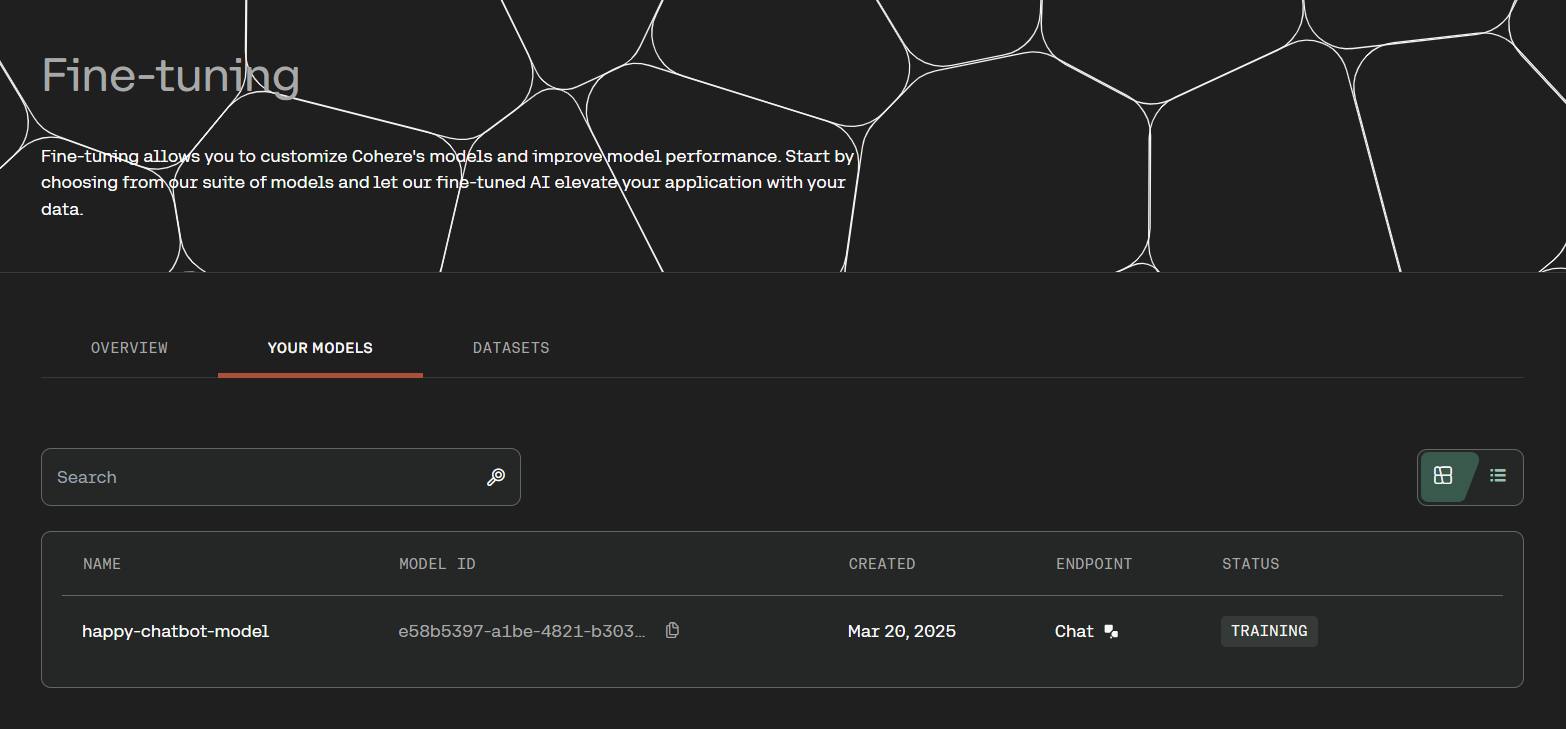

Sau khi mô hình được tinh chỉnh, chúng ta sẽ có được cái nhìn tổng quan về kết quả. Như bạn có thể thấy trong hình ảnh trên, độ chính xác của mô hình khá thấp. Tại sao? Chúng tôi chỉ cung cấp cho mô hình một tập dữ liệu hai hàng. Để cải thiện độ chính xác, hãy thử cung cấp cho mô hình dữ liệu thực tế có ít nhất 1000 hàng. Để truy cập mô hình được tinh chỉnh của chúng tôi, chúng tôi có thể cung cấp ID mô hình cho hàm .chat(), cùng với phần mở đầu, tin nhắn và max_tokens. Bạn có thể tìm ID mô hình bằng cách vào bảng điều khiển, chọn tùy chọn “Tinh chỉnh”, sau đó chọn "MÔ HÌNH CỦA BẠN" và sao chép ID mô hình từ danh sách các mô hình được tinh chỉnh.

In [59]:
response = co.chat(
    model="e58b5397-a1be-4821-b303-e968158a5a7e-ft",
    preamble="You are a happy chatbot that puts a positive spin on everything.",
    message="I burned my finger while barbecuing.",
    max_tokens=100
)

print(response.text)


Ouch, that sounds painful! But hey, at least you were enjoying some delicious barbecue! It's always a good idea to be extra careful around the grill to avoid such mishaps. Hope your finger heals up quickly!


# 4. Building an AI Project Using Command R+

## 4.1. Installing Python packages

In [84]:
%pip install --quiet langchain langchain_cohere langchain_experimental

Note: you may need to restart the kernel to use updated packages.


## 4.2. Setting up the Cohere chat model

Sau đó, chúng tôi sử dụng LangChain Python API để tạo một ứng dụng trò chuyện bằng cách cung cấp khóa API Cohere mà chúng tôi đã tạo trước đó. Chúng tôi sẽ sử dụng Command R+ làm mô hình ngôn ngữ trong tác nhân AI.

In [86]:
import os
from langchain_cohere.chat_models import ChatCohere

model_name = "command-r-plus"
cohere_api_key = os.environ.get('COHERE_API_KEY')
chat = ChatCohere(
    model=model_name,
    temperature=0.7,
    api_key=cohere_api_key,
)

## 4.3. Setting up Tavily for Internet search

Sign up for Tavily and copy your API key. Tavily is an internet search API for LLMs and RAG pipelines.

Để tạo công cụ tìm kiếm trên internet, hãy cung cấp khóa API vừa tạo dưới dạng biến môi trường

In [85]:
from langchain_community.tools.tavily_search import TavilySearchResults

internet_search = TavilySearchResults(api_key=os.environ['TAVILY_API_KEY'])
internet_search.name = "internet_search"
internet_search.description = "Returns a list of relevant documents from the internet."

from langchain_core.pydantic_v1 import BaseModel, Field

class TavilySearchInput(BaseModel):
    query: str = Field(description="Internet query engine.")

internet_search.args_schema = TavilySearchInput

## 4.4. Setting up Python REPL

Việc tạo một công cụ Python REPL rất đơn giản: cung cấp cho lớp Tool một đối tượng Python REPL, tên và mô tả, sau đó sửa đổi lược đồ đối số như hiển thị bên dưới.

In [87]:
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="Executes python code and returns the result.",
    func=python_repl.run,
)
repl_tool.name = "python_interpreter"

class ToolInput(BaseModel):
    code: str = Field(description="Python code execution.")

repl_tool.args_schema = ToolInput

## 4.5. Creating and executing the AI agent

Bây giờ, chúng ta sẽ kết hợp mọi thứ để tạo ra tác nhân AI (AI agent) nhiều bước bằng hàm .create_cohere_react_agent(), máy khách mô hình Cohere, các công cụ và mẫu nhắc. Để thực thi tác nhân AI của chúng ta, chúng ta sẽ sử dụng lớp AgentExecutor bằng cách cung cấp cho nó đối tượng tác nhân và các công cụ.

In [88]:
from langchain.agents import AgentExecutor
from langchain_cohere.react_multi_hop.agent import create_cohere_react_agent
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("{input}")

agent = create_cohere_react_agent(
    llm=chat,
    tools=[internet_search, repl_tool],
    prompt=prompt,
)

agent_executor = AgentExecutor(agent=agent, tools=[internet_search, repl_tool], verbose=True)

## 4.6. Testing the agent

Sau đó, chỉ cần sử dụng agent_executor để tạo hình ảnh trực quan. Trong trường hợp của chúng tôi, chúng tôi yêu cầu tác nhân AI thu thập dữ liệu mới nhất từ ​​internet và tạo biểu đồ hình tròn.

In [ ]:
response = agent_executor.invoke({
    "input": "Create a pie chart of the top 5 most used programming languages in 2024.",
})